In [1]:
#%%                    Chem 210A  C.W. McCurdy
#                         Jan  2019
#        Examples with complex numbers in python
#        and SymPy  as a starting point for problems
#
#  Note that SymPy is a bit clumsy, but we will occasionally make use
#  of it for symbolic manipulation.  It's no replacement for Mathematica
#
# preliminaries to invoke sympy and numpy, not sympy is used here only
# to define the value of pi, which can be done in other ways

In [4]:
import numpy as np
from sympy import * 
import matplotlib.pyplot as plt   # for plotting
from datascience import*
%matplotlib inline # datascience needs this
plt.style.use('fast') # I dont like the default 

UsageError: unrecognized arguments: # datascience needs this


In [3]:
#
#  simplify()frequently doesn't simplify powers and exponents unless 
#   the variables are real.  See the documentation on simplification
#   of powers at http://docs.sympy.org/dev/tutorial/simplification.html
#
#Z = symbols('Z',real=True)
#i, k, l, nbas  = symbols('i k l nbas',integer=True)
#
# *** Complex Arithemetic
# with sympy imported in its entirety, j is a special symbol meaning sqrt(-1), 
# if it is preceeded by a number 3.0*j is not the same as 3.0j
# to get just a factor of i=sqrt(-1), use 1j or 1.0j
#
# multiply and divide complex numbers

In [3]:
print("\n multiply and divide complex numbers ")
print( "\n (1.0 + 3.0j)*(1.0 -3.0j)) = ", (1.0 + 3.0j)*(1.0 -3.0j))
print( "\n (1.0 + 3.0j)/(1.0 -3.0j)) = ", (1.0 + 3.0j)/(1.0 -3.0j))
#  exponentials
print("\n exponentials ")
print("\n  exp(1j*pi) = ",exp(1j*pi))
print("\n simplify(exp(1j*pi))) gives: ",simplify(exp(1.0j*pi))) 


 multiply and divide complex numbers 

 (1.0 + 3.0j)*(1.0 -3.0j)) =  (10+0j)

 (1.0 + 3.0j)/(1.0 -3.0j)) =  (-0.7999999999999999+0.6j)

 exponentials 

  exp(1j*pi) =  exp(1.0*I*pi)

 simplify(exp(1j*pi))) gives:  -1


In [5]:
#==============================================================================
# time-dependent particle in a box example using complex valued wave functions
#==============================================================================

In [5]:
L = symbols(' L ',real=True, positive=True)
x, t= symbols(' x t ', real=True)
n, m  = symbols('n m', integer=True, positive=True)  # note this must be integer, not int
M = symbols(' M ',real=True, positive= True)
h_bar = symbols(' h_bar ',real=True,positive=true)

In [7]:
#
# sometimes uses "pretty print" pprint() to make the results readable on 
#  the console or in spyder 
#
pprint?

In [5]:
pprint(exp(1j*pi))
print(exp(1j*pi))
# exp(1j*pi)

 1.0⋅ⅈ⋅π
ℯ       
exp(1.0*I*pi)


In [6]:
def psi(n,L,x):
    result = sqrt(2/L)*sin(n*pi*x/L)
    return result

print("\nTime-independent wave function is psi_m = ", psi(m,L,x) )


Time-independent wave function is psi_m =  sqrt(2)*sin(pi*m*x/L)/sqrt(L)


In [7]:
def Energy(n,L):
    result = n**2 * pi**2 * h_bar**2/( 2*M*L**2 )
    return result

# note the case sensitivity of python
print("\n Energy is (note case sensitivity m is not M):  E_m = ",Energy(m,L))


 Energy is (note case sensitivity m is not M):  E_m =  pi**2*h_bar**2*m**2/(2*L**2*M)


In [8]:
def Psi(n,L,x,t):
    result = psi(n,L,x)*exp(-1j*Energy(n,L)*t/h_bar)
    return result

print("\nTime-independent wave function is Psi_n = ", Psi(n,L,x,t) )


Time-independent wave function is Psi_n =  sqrt(2)*exp(-0.5*I*pi**2*h_bar*n**2*t/(L**2*M))*sin(pi*n*x/L)/sqrt(L)


In [7]:
# two ways to compute |Psi|^2
#
absolute_value_sq = abs(Psi(m,L,x,t))**2
print("\n |Psi_n(x,t)|**2 = ",absolute_value_sq)
#
absolute_value = conjugate(Psi(m,L,x,t))*Psi(m,L,x,t)
print("\n Psi_n(x,t)^* times Psi_n(x,t) = ",absolute_value)


 |Psi_n(x,t)|**2 =  2*sin(pi*m*x/L)**2/L

 Psi_n(x,t)^* times Psi_n(x,t) =  2*sin(pi*m*x/L)**2/L


In [8]:
#==============================================================================
# #  define a linear superposition of the ground and first excited state
#==============================================================================

In [9]:
def Phi(L,x,t):
    result = (1/sqrt(2))*(Psi(1,L,x,t) + 1j* Psi(2,L,x,t))
    return result

In [13]:
####### modified equation 1
def Phi2(L,x,t):
    exponent  = exp(pi*1j/4)
    result = (1/sqrt(2))*(Psi(1,L,x,t) + exponent* Psi(2,L,x,t))
    return result

In [9]:
####### modified equation 2
def Phi3(L,x,t):
    exponent  = exp(-1*pi*1j/4)
    result = (1/sqrt(2))*(Psi(1,L,x,t) + exponent* Psi(2,L,x,t))
    return result

In [67]:
print("\n  time-dependent superposition of two particle in a box states \n")
pprint(Phi(L,x,t))
#
print("\n complex test value still has h_bar and M as variables = Phi(2,1,.5)",Phi(2,1,.5))


  time-dependent superposition of two particle in a box states 

   ⎛                  2                                   2                  ⎞
   ⎜          -2.0⋅ⅈ⋅π ⋅h_bar⋅t                   -0.5⋅ⅈ⋅π ⋅h_bar⋅t          ⎟
   ⎜          ──────────────────                  ──────────────────         ⎟
   ⎜                  2                                   2                  ⎟
   ⎜                 L ⋅M           ⎛2⋅π⋅x⎞              L ⋅M           ⎛π⋅x⎞⎟
   ⎜1.0⋅√2⋅ⅈ⋅ℯ                  ⋅sin⎜─────⎟   √2⋅ℯ                  ⋅sin⎜───⎟⎟
   ⎜                                ⎝  L  ⎠                             ⎝ L ⎠⎟
√2⋅⎜─────────────────────────────────────── + ───────────────────────────────⎟
   ⎝                   √L                                    √L              ⎠
──────────────────────────────────────────────────────────────────────────────
                                      2                                       

 complex test value still has h_bar and M as variables = Phi(2,1

In [16]:
print("\n  time-dependent superposition of two particle in a box states \n")
print(Phi(L,x,t))
#
print("\n complex test value still has h_bar and M as variables = Phi(2,1,.5)",Phi(2,1,.5))


  time-dependent superposition of two particle in a box states 

sqrt(2)*(1.0*sqrt(2)*I*exp(-2.0*I*pi**2*h_bar*t/(L**2*M))*sin(2*pi*x/L)/sqrt(L) + sqrt(2)*exp(-0.5*I*pi**2*h_bar*t/(L**2*M))*sin(pi*x/L)/sqrt(L))/2

 complex test value still has h_bar and M as variables = Phi(2,1,.5) 0.5*sqrt(2)*exp(-0.0625*I*pi**2*h_bar/M)


In [17]:
#%%
#==============================================================================
# plotting example: plot real and imaginary parts of  a function
#==============================================================================
#
#  **** Make properly labeled graph and save it as .png or .pdf
#  first make the arrays with x y points for each curve

In [13]:
time = 5  # set the time
time_string = str(time) # string for a plot label
h_bar = 1  # use atomic units by setting h_bar = 1
M = 1  #  mass of electron is 1 in atomic units
npts = 50
alen = 2.0
dx = alen/(npts-1)
xpts = []
Phiptsre = []
Phiptsim = []
Phiptsabs = []
for n in range(0,npts+1):
    xpoint =  dx*n
    xpts.append(xpoint)
#  note use of N() to get a clean numerical value from the symbolic function
    Phiptsim.append(im(N(Phi(alen,xpoint,time))))
    Phiptsre.append(re(N(Phi(alen,xpoint,time))))
    Phiptsabs.append(Abs(N(Phi(alen,xpoint,time))))  
#
# commands to specify elements of the plot
#

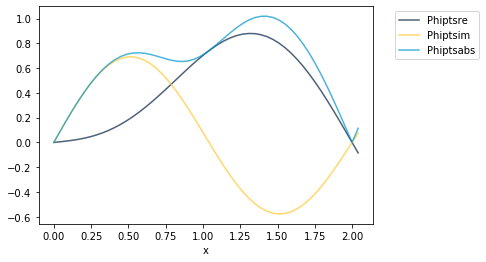

In [36]:
PIB = Table().with_columns("x",xpts,"Phiptsre",Phiptsre,"Phiptsim",Phiptsim,"Phiptsabs",Phiptsabs)
PIB.plot(0)

In [15]:
### 2
time = 5  # set the time
time_string = str(time) # string for a plot label
h_bar = 1  # use atomic units by setting h_bar = 1
M = 1  #  mass of electron is 1 in atomic units
npts = 50
alen = 2.0
dx = alen/(npts-1)
xpts = []
Phiptsre2 = []
Phiptsim2 = []
Phiptsabs2 = []
for n in range(0,npts+1):
    xpoint =  dx*n
    xpts.append(xpoint)
#  note use of N() to get a clean numerical value from the symbolic function
    Phiptsim2.append(im(N(Phi2(alen,xpoint,time))))
    Phiptsre2.append(re(N(Phi2(alen,xpoint,time))))
    Phiptsabs2.append(Abs(N(Phi2(alen,xpoint,time))))  
#
# commands to specify elements of the plot
#

In [10]:
#### 3 
time = 5  # set the time
time_string = str(time) # string for a plot label
h_bar = 1  # use atomic units by setting h_bar = 1
M = 1  #  mass of electron is 1 in atomic units
npts = 50
alen = 2.0
dx = alen/(npts-1)
xpts = []
Phiptsre3 = []
Phiptsim3 = []
Phiptsabs3 = []
for n in range(0,npts+1):
    xpoint =  dx*n
    xpts.append(xpoint)
#  note use of N() to get a clean numerical value from the symbolic function
    Phiptsim3.append(im(N(Phi3(alen,xpoint,time))))
    Phiptsre3.append(re(N(Phi3(alen,xpoint,time))))
    Phiptsabs3.append(Abs(N(Phi3(alen,xpoint,time))))  
#
# commands to specify elements of the plot
#

In [14]:
plt.xlabel(" x (bohr) ",fontsize=16,fontweight='bold')
plt.ylabel(" Phi(t) ",fontsize=16,fontweight='bold') 
plt.xlim(0,alen)   # x limits specified, y limits could be specified too
#  the plotted lines themselves
plt.plot(xpts,Phiptsre,'-r',label="re[Phi(t ="+time_string+")]")
plt.plot(xpts,Phiptsim,'-b',label="im[Phi(t ="+time_string+")]")
plt.plot(xpts,Phiptsabs,'k',label="abs[Phi(t ="+time_string+")]")
#
plt.legend(loc="best")  # add the legends after the curves are plotted
plt.plot([0,alen],[0,0],'k')  # put in a line at the value Phi = 0


plt.suptitle('Particle-in-a-box', fontsize=16, fontweight='bold')
plt.savefig('P_in_box_time_dep'+time_string+'.pdf', transparent=False)

# plt.savefig('problem_set_3_figure_'+number_string+'.png', transparent=False)
print("\n close figure window to proceed")
plt.show()
exit()


 close figure window to proceed


C:\psi4conda\envs\p4env\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


In [16]:
# for 2
plt.xlabel(" x (bohr) ",fontsize=16,fontweight='bold')
plt.ylabel(" Phi(t) ",fontsize=16,fontweight='bold') 
plt.xlim(0,alen)   # x limits specified, y limits could be specified too
#  the plotted lines themselves
plt.plot(xpts,Phiptsre2,'-r',label="re[Phi(t ="+time_string+")]")
plt.plot(xpts,Phiptsim2,'-b',label="im[Phi(t ="+time_string+")]")
plt.plot(xpts,Phiptsabs2,'k',label="abs[Phi(t ="+time_string+")]")
#
plt.legend(loc="best")  # add the legends after the curves are plotted
plt.plot([0,alen],[0,0],'k')  # put in a line at the value Phi = 0


plt.suptitle('Particle-in-a-box_2', fontsize=16, fontweight='bold')
plt.savefig('P_in_box_time_dep_2'+time_string+'.pdf', transparent=False)

# plt.savefig('problem_set_3_figure_'+number_string+'.png', transparent=False)
print("\n close figure window to proceed")
plt.show()
exit()


 close figure window to proceed


C:\psi4conda\envs\p4env\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


In [11]:
# for 3 
plt.xlabel(" x (bohr) ",fontsize=16,fontweight='bold')
plt.ylabel(" Phi(t) ",fontsize=16,fontweight='bold') 
plt.xlim(0,alen)   # x limits specified, y limits could be specified too
#  the plotted lines themselves
plt.plot(xpts,Phiptsre3,'-r',label="re[Phi(t ="+time_string+")]")
plt.plot(xpts,Phiptsim3,'-b',label="im[Phi(t ="+time_string+")]")
plt.plot(xpts,Phiptsabs3,'k',label="abs[Phi(t ="+time_string+")]")
#
plt.legend(loc="best")  # add the legends after the curves are plotted
plt.plot([0,alen],[0,0],'k')  # put in a line at the value Phi = 0


plt.suptitle('Particle-in-a-box3', fontsize=16, fontweight='bold')
plt.savefig('P_in_box_time_dep3'+time_string+'.pdf', transparent=False)

# plt.savefig('problem_set_3_figure_'+number_string+'.png', transparent=False)
print("\n close figure window to proceed")
plt.show()
exit()


 close figure window to proceed


C:\psi4conda\envs\p4env\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
